In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Data Cleaning

In [2]:
df = pd.read_csv("survey.csv")
df["Do you work on or off campus?"].fillna(0, inplace = True)
df["How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs)."].fillna(0, inplace = True)
df["How many hours in a typical week do you work?"].fillna(0, inplace = True)
df.at[19, 'How many hours in a typical week do you work?'] = '60'
df.at[30, 'How many hours in a typical week do you work?'] = '15'
df.at[38, 'How many hours in a typical week do you work?'] = '0'
df.at[82, 'How many hours in a typical week do you work?'] = '23'
df.at[83, 'How many hours in a typical week do you work?'] = '12'
df.at[64, 'How many hours in a typical week do you work?'] = '0'
df.at[20, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '2'
df.at[31, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '1'
df.at[40, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '1'
df.at[42, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '0'
df.at[24, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '0'
df.at[34, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '3'
df.at[82, 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = '1'
df['How many hours in a typical week do you work?'] = df['How many hours in a typical week do you work?'].astype(int)
df['How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'] = df['How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'].astype(int)
df2 = df[['What is your age?', 'What gender do you identify as?', 'What year are you?', 'How often do you attend office hours?', 'How often do you attend lectures for your classes?', 'How often do you ask questions in your lectures?', 'Do you work on or off campus?', 'How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).', 'How many hours in a typical week do you work?']].copy()
df2.head()

,What is your age?,What gender do you identify as?,What year are you?,How often do you attend office hours?,How often do you attend lectures for your classes?,How often do you ask questions in your lectures?,Do you work on or off campus?,"How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).",How many hours in a typical week do you work?
0,21,Woman,Junior,2,5,2,On campus,1,20
1,20,Man,Sophomore,1,5,2,Off Campus,2,20
2,19,Man,Sophomore,2,5,4,0,2,0
3,20,Man,Junior,3,4,2,Off Campus,1,10
4,21,Man,Junior,1,5,1,0,0,0


What data do we have?
The data we have measures students’ involvement within school. We gathered how often students attend office hours and lectures, how often they ask questions in class, the number of extra curricular activities they are involved in, if they work a non-academic vs academic job, how many hours 

What would we like to know?
How does having an academic vs non-academic job affect involvement in school?

Statistics

Visualizations

Do you work on or off campus?          Off Campus  On campus
How often do you attend office hours?                       
1                                        0.184211   0.263158
2                                        0.157895   0.315789
3                                        0.026316   0.052632
AxesSubplot(0.125,0.125;0.62x0.755)


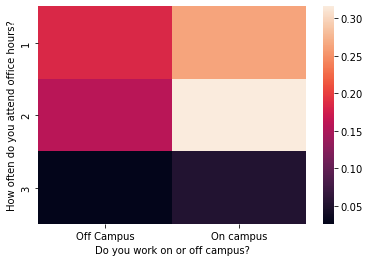

In [3]:
df3 = df2
index_names = df3[ df3['Do you work on or off campus?'] == 0 ].index
df3.drop(index_names, inplace = True)
df3.head()
officeh = pd.crosstab(df3['How often do you attend office hours?'], df3['Do you work on or off campus?'], normalize = True)
print(officeh)
print(sns.heatmap(officeh))

Do you work on or off campus?                       Off Campus  On campus
How often do you attend lectures for your classes?                       
2                                                            2          0
3                                                            2          3
4                                                            3          8
5                                                            7         13
AxesSubplot(0.125,0.125;0.62x0.755)


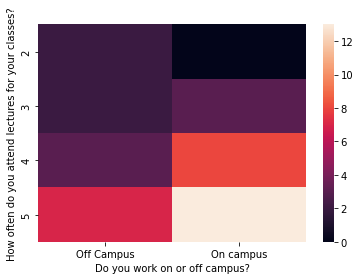

In [4]:
lectures = pd.crosstab(df3['How often do you attend lectures for your classes?'], df3['Do you work on or off campus?'])
print(lectures)
print(sns.heatmap(lectures))

<AxesSubplot:xlabel='Do you work on or off campus?'>

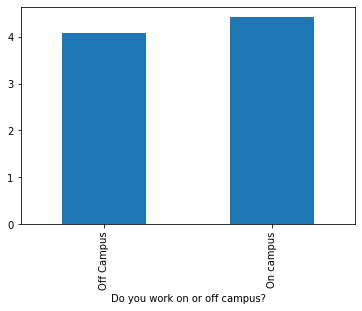

In [22]:
X = df3.groupby("Do you work on or off campus?").mean()["How often do you attend lectures for your classes?"]
X.plot.bar()

In [6]:
questions = pd.crosstab(df3['How often do you ask questions in your lectures?'], df3['Do you work on or off campus?'], normalize=True)
print(questions)

Do you work on or off campus?                     Off Campus  On campus
How often do you ask questions in your lectures?                       
1                                                   0.157895   0.236842
2                                                   0.105263   0.263158
3                                                   0.052632   0.105263
4                                                   0.000000   0.026316
5                                                   0.052632   0.000000


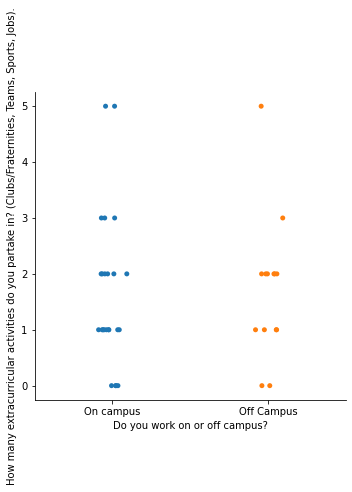

In [7]:
sns.catplot(x='Do you work on or off campus?', y="How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).", data=df3)

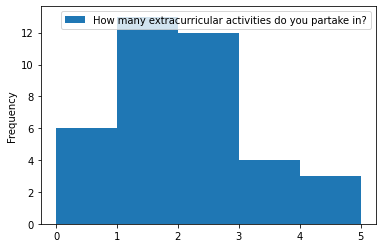

In [8]:
df_extra = df2[['How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).']].copy()
df_extra = df_extra.rename(columns={"How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).": "How many extracurricular activities do you partake in?"})
ax_extra = df_extra.plot.hist(bins=5)

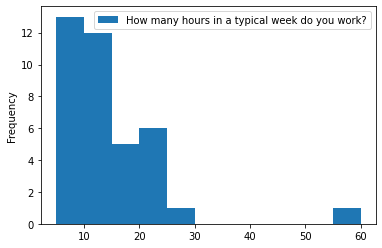

In [9]:
df_work = df2[['How many hours in a typical week do you work?']].copy()
ax_work = df_work.plot.hist(bins=11)

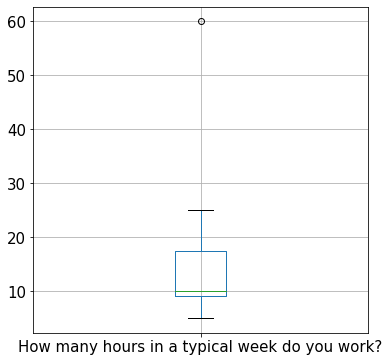

In [10]:
df_work = df2[['How many hours in a typical week do you work?']].copy()
boxplot = df_work.boxplot(column=['How many hours in a typical week do you work?'], fontsize = 15, figsize=(6,6))  

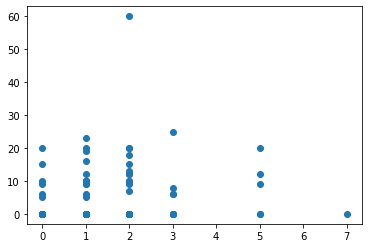

In [18]:
plt.scatter(df['How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'], df['How many hours in a typical week do you work?'])
plt.show()

Hypotheses

Hypothesis 1: Those who have on-campus jobs attend lectures more often than those who have off-campus jobs.
Chi Squared Test

Hypothesis 2: Those who work more hours in a week have more extracurricular activities that they partake in. 
Correlation Test

Hypothesis 3: Those who have on-campus jobs attend office hours more often than those who have off-campus jobs.
Chi Squared Test

Tests

Hypothesis 1 Test:

In [12]:
chi, p, dfree, expected = chi2_contingency(lectures)
print("calculated chi square value: " ,chi)

calculated chi square value:  3.912067099567099


In [13]:
print("for 3 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(1-0.05, 3)

for 3 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:


7.814727903251179

Hypothesis 2 Test:

In [14]:
df3['How many hours in a typical week do you work?'].corr(df3['How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).'], method = 'pearson')

0.09119196084257807

Hypothesis 3 Test:

In [15]:
chi, p, dfree, expected = chi2_contingency(officeh)
print("calculated chi square value: " ,chi)

calculated chi square value:  0.006535947712418299


In [17]:
print("for 2 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(1-0.05, 2)

for 2 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:


5.991464547107979

Do you work on or off campus?
Off Campus    1.571429
On campus     1.666667
Name: How often do you attend office hours?, dtype: float64


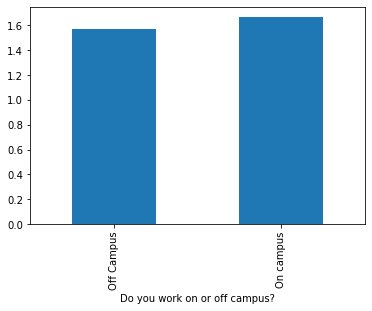

In [23]:
df_group_OH = df2.groupby(['Do you work on or off campus?']).mean()['How often do you attend office hours?']
print(df_group_OH)
df_group_OH = df_group_OH.plot.bar()

Do you work on or off campus?
Off Campus    2.142857
On campus     1.875000
Name: How often do you ask questions in your lectures?, dtype: float64


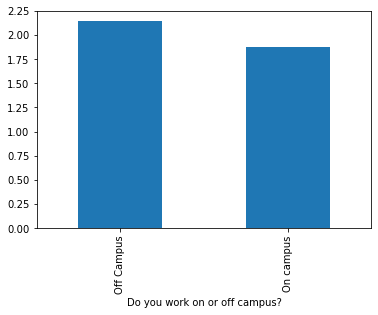

In [24]:
df_group_questions = df2.groupby(['Do you work on or off campus?']).mean()['How often do you ask questions in your lectures?']
print(df_group_questions)
df_group_questions = df_group_questions.plot.bar()

Do you work on or off campus?
Off Campus    1.714286
On campus     1.666667
Name: How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs)., dtype: float64


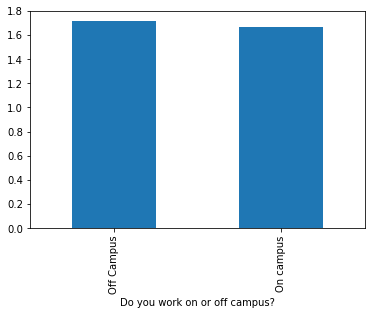

In [25]:
df_group_extra = df2.groupby(['Do you work on or off campus?']).mean()['How many extracurricular activities do you partake in? (Clubs/Fraternities, Teams, Sports, Jobs).']
print(df_group_extra)
df_group_extra = df_group_extra.plot.bar()

Do you work on or off campus?
Off Campus    17.571429
On campus     11.250000
Name: How many hours in a typical week do you work?, dtype: float64


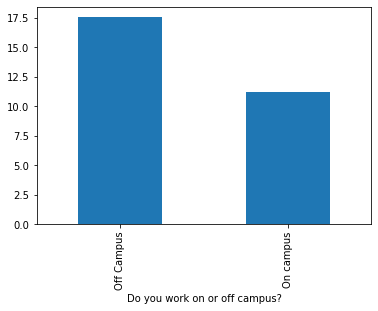

In [26]:
df_group_work = df2.groupby(['Do you work on or off campus?']).mean()['How many hours in a typical week do you work?']
print(df_group_work)
df_group_work = df_group_work.plot.bar()